# Advanced Python for Data Science
DS-GA-3001.001/.002

Assignment 04
Due date: 03/01/2019, 8:00AM

# Problem 1

The task is to optimize your solution by using "line_profiler". 

Your submission will contain two jupyter notebook files:
- your first (original) solution hw04_yourid_original.ipynb (a solution that you originally wrote); 
- and a final, optimized, solution hw04_yourid_optimized.ipynb (an optimized solution by using line_profiler);  
both of which will include the line_profiler results, and your short comments.


The problem is to simulate the following dynamical scenario.

There is a unit square $[0,1]^2$. The time is discrete $t=0,1,2,\dots$. 

At every time stem there are $n$ points within the square; call these positions $\{x_0,x_1,x_2,\dots,x_{n-1}\}$. At $t=0$ positions of the points are randomly and uniformly distributed.
    
At every time step $t \geq 0$, we calculate $L(t)$ which corresponds to a path length that one would need to myopically traverse all $n$ points. In other words, $L(t)$ is calculated as follows:

- Mark all points non-visited.   
- Among all the $n$ points, choose uniformly one point, and mark it visited.  
- Then iteratively traverse the non-visited points while visiting the closest point.  
- Denote by $L(t)$ the distance of such a path. 

**Algorithmically it as:**

- let path_length := 0
- mark all the $n$ points non-visited;
- pick one point, uniformly at random;
- call it previous_point, and mark the previous_point visited;

Then repeat $(n-1)$ times{
1. pick the point among the non-visited points, which is the closest to the previous_point, and call it current_point; 
2. calculate the Euclidean distance between the current_point and the previous_point;
2. increment path_length by that distance;
3. mark the current_point as visited; 
4. re-label the current_point to be the previous point. 
}

Your myopic path-lenght $L(t)$ := path_length. 

**Dynamics**

Now, one would like to examine how a random perturbation of a fraction of the positions can change the value of $L(t)$ over time $t=0, 1, 2,\dots$. That is, given an integer $T$, which corresponds to the number of iterations, 
$n$ the number of points, and $alpha$ which is fraction of points you perturb at new time step, your function will return and plot the values: $L(0), L(1),\dots, L(T-1)$. 

To do so:

Set t=0: 
- at time $t$, calculate $L(t)$; 
- at the next time step $t := t+1$, you pick uniformly $int(\alpha \cdot n)$ points which you will perturb;
- assign these  $int(\alpha \cdot n)$ points random positions within the unit square;
- calculate new $L(t)$;
and repeat $T$ times. 



Your main function should look like:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

def minEucDistance(previous_point,positions): 

    distances = [math.sqrt((previous_point[0]-point[0])**2 + (previous_point[1] - point[1])**2) for point in positions]
    dist_dict = dict(zip(positions,distances))
    return min(dist_dict, key=dist_dict.get), dist_dict[min(dist_dict, key=dist_dict.get)]

def returnPerturbations(perturb_no,positions):
    new_positions = []
    old_positions = []
    for p in range(0,math.floor(perturb_no)):
        while True:
            old_pos = random.choice(positions)
            px = np.random.uniform(size=1)
            py = np.random.uniform(size=1)
            if old_pos[0] + px <= 1 and old_pos[1] + py <= 1:
                break
        new_positions.append(((old_pos[0]+px)[0], (old_pos[1] + py)[0]))
        old_positions.append(old_pos)
    return new_positions, old_positions

def main(n, alpha, T): 
    """ 
    n: there are n points in the unit square 
    alpha: alpha is the portion of points you redistribute at every time step 
    T: number of iterations
    return: 
    length_array: list of caluclated values L(0), L(1),\dots, L(T-1) 
    plot the diagram L(t) for t= 0, 1,...,T-1
    """
    x = np.random.uniform(size=n)
    y = np.random.uniform(size=n)
    positions = list(zip(x,y))
    length_array = []
    position_status = dict((key, value) for (key, value) in zip(positions, [False]*(len(positions))))
    starting_point = random.choice(positions)
    positions.remove(starting_point)
    position_status[starting_point] = True
                    

    for t in range(0,T):      
        #perturbation of points
        if t > 0: 
            positions = list(position_status.keys())
            perturb_no = n*alpha
            new_pos, old_pos = returnPerturbations(perturb_no, positions)
            positions = [rp for rp in positions if rp not in old_pos]
            positions.extend(new_pos)
            position_status = {key: position_status[key] for key in list(position_status.keys()) if key not in old_pos}
            
        for p in range(0,n):
            if len(positions) > 1: 
                path_length = 0
                if p == 0:
                    previous_point = starting_point
    
                #find shortest path through all points
                current_point,increment = minEucDistance(previous_point,positions)
                path_length += increment
                positions.remove(current_point)
                position_status[current_point] = True
                previous_point = current_point
                
        length_array.append(path_length)
    
    plt.xlabel('Iteration (t)')
    plt.ylabel('L(t)')
    plt.title('Mypoic Distance Calculation')
    plt.bar([i for i in range(0,T)],length_array)
    plt.show()
    
    return length_array

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


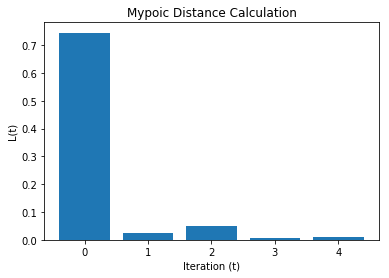

In [6]:
%load_ext line_profiler
%lprun -f main main(1000,.5,5)

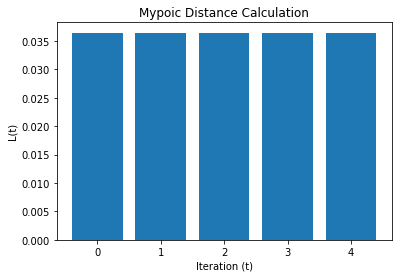

In [7]:
%lprun -f main main(1000,0,5)

# Short Comments

This is my original solution. According to line profiler, the biggest bottleneck in my process is when my code is calculating the minimum euclidean distance from my current point. 